# 아이펠 3주차 월요일(0905)

# 10. 다양한 데이터 전처리 기법

## 10.1. 들어가며

### 전처리는 왜 중요할까?
 - "데이터 분석의 8할은 데이터 전처리이다."

### 데이터를 준비하자.
 - [trade.csv](https://d3s0tskafalll9.cloudfront.net/media/documents/trade.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("👽 Hello.")

👽 Hello.


In [2]:
import os

csv_file_path = 'data/trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


## 10.2. 결측치(Missing Data)

In [3]:
print('전체 데이터 건수:', len(trade))

전체 데이터 건수: 199


In [4]:
print('컬럼별 결측치 개수')
len(trade) - trade.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

### 10.2.1. DataFrame.drop()
 - documentation : [DataFrame.drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) 
 - `axis = 0`은 행을 삭제할 때 사용한다.
 - `axis = 1`는 열을 삭제할 때 사용한다.

In [5]:
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


### 10.2.2. DataFrame.isnull()
 - documentation : [DataFrame.isnull](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) 
 - DataFrame.isnull is an alias of DataFrame.isna

In [6]:
df = pd.DataFrame(dict(age=[5, 6, np.NaN],
                   born=[pd.NaT, pd.Timestamp('1939-05-27'),
                         pd.Timestamp('1940-04-25')],
                   name=['Alfred', 'Batman', ''],
                   toy=[None, 'Batmobile', 'Joker']))

In [7]:
df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [8]:
df.isna()

,age,born,name,toy
0,False,True,False,True
1,False,False,False,False
2,True,False,False,False


In [9]:
trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [10]:
trade.isna()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


### 10.2.3. DataFrame.any()
 - documentation : [DataFrame.any](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)
 - 해당 행(열)에 `False` 혹은 `0`이 아닌 것이 하나라도 있으면 `True`를 출력한다.
 - `axis`의 의미는 어떤 `axis`를 reduce하겠느냐 하는 의미
    - 예를 들어 `axis=0`이면 행의 방향으로 reduce하고 열은 남기겠다는 의미.
    - default : `axis = 0`

In [11]:
df = pd.DataFrame({"A": [1, 2], "B": [0, 2], "C": [0, 0]})
df

,A,B,C
0,1,0,0
1,2,2,0


In [12]:
df.any()

A     True
B     True
C    False
dtype: bool

In [13]:
df.any(axis = 0)

A     True
B     True
C    False
dtype: bool

In [14]:
df.any(axis = 1)

0    True
1    True
dtype: bool

In [15]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [16]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


### 10.2.4. Dataframe.dropna()

In [17]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})

In [18]:
df1 = df.dropna()
df1

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [19]:
df2=df.dropna(axis='columns')
df2

,name
0,Alfred
1,Batman
2,Catwoman


In [20]:
df3=df.dropna(axis=1)
df3

,name
0,Alfred
1,Batman
2,Catwoman


axis의 default 값은 `'row'`(혹은 `'index'` 혹은 `0` 이다.)

In [21]:
df4 = df.dropna(how='all')
df4 

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


how의 default값은 `any`이다.

In [22]:
df5 = df.dropna(subset=['name', 'toy'])
df5

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [23]:
trade.tail(10)

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
189,2020년 03월,일본,150602.0,2486175.0,153670.0,4394441.0,-1908266.0
190,2020년 04월,중국,194716.0,10164071.0,365746.0,9619835.0,544236.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0
195,2020년 05월,일본,166568.0,1798128.0,133763.0,3102734.0,-1304606.0
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [24]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
print("👽 It's okay, no biggie.")
trade.tail(10)

👽 It's okay, no biggie.


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
189,2020년 03월,일본,150602.0,2486175.0,153670.0,4394441.0,-1908266.0
190,2020년 04월,중국,194716.0,10164071.0,365746.0,9619835.0,544236.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0
195,2020년 05월,일본,166568.0,1798128.0,133763.0,3102734.0,-1304606.0


In [25]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


### 10.2.5. Dataframe.loc[]

In [26]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])
df

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [27]:
df.loc['viper']

max_speed    4
shield       5
Name: viper, dtype: int64

In [28]:
trade.loc[[188, 191, 194]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


### 10.2.5. 결측치 채우기 (교재의 방법)

In [29]:
import copy

In [30]:
trade1 = copy.deepcopy(trade)
trade1.loc[191, '수출금액'] = (trade1.loc[188, '수출금액'] + trade1.loc[194, '수출금액'] )/2
trade1.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [31]:
trade1.loc[191, '무역수지'] = trade1.loc[191, '수출금액'] - trade1.loc[191, '수입금액'] 
trade1.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


In [32]:
trade1

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


### 10.2.6. 결측치 채우기 (내가 생각한 방법)

In [33]:
trade2 = copy.deepcopy(trade)
trade2.loc[191, '수출금액'] = np.mean(trade2['수출금액'])
trade2.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,6.584133e+06,1141118.0,5038739.0,NaN


In [34]:
trade2.loc[191, '무역수지'] = trade2.loc[191, '수출금액'] - trade2.loc[191, '수입금액'] 
trade2.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,6.584133e+06,1141118.0,5038739.0,1.545394e+06


In [35]:
trade2

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,1.208395e+07,334522.0,8143271.0,3.940676e+06
1,2015년 01월,미국,65888.0,5.561545e+06,509564.0,3625062.0,1.936484e+06
2,2015년 01월,일본,54017.0,2.251307e+06,82480.0,3827247.0,-1.575940e+06
3,2015년 02월,중국,86228.0,9.927642e+06,209100.0,6980874.0,2.946768e+06
4,2015년 02월,미국,60225.0,5.021264e+06,428678.0,2998216.0,2.023048e+06
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,6.584133e+06,1141118.0,5038739.0,1.545394e+06
192,2020년 04월,일본,134118.0,1.989323e+06,141207.0,3989562.0,-2.000239e+06
193,2020년 05월,중국,185320.0,1.074607e+07,349007.0,8989920.0,1.756149e+06
194,2020년 05월,미국,126598.0,4.600726e+06,1157163.0,4286873.0,3.138530e+05


이러한 trade1에서 사용한 방식을 보간법(interpolation)이라고 불렀었다.

In [36]:
trade = trade1

## 10.3. 중복된 데이터

In [37]:
trade

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


### 10.3.1. Dataframe.duplicated()

In [38]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [39]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [40]:
df[df.duplicated()]

,brand,style,rating
1,Yum Yum,cup,4.0


In [41]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [42]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [43]:
trade.loc[[186,187,188]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0


### 10.3.2. Dataframe.drop_duplicated()

In [44]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [45]:
df.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [46]:
df.drop_duplicates(subset=['brand'])

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5


In [47]:
df.drop_duplicates(subset=['brand', 'style'])

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0


In [48]:
df.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


In [49]:
trade.drop_duplicates(inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


## 10.4. 이상치(Outlier)

### 10.4.1. z-score method

In [50]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [51]:
# 테스트
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [52]:
outlier(df,'rating',0)

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [53]:
for z in range(3):
    print("z=",str(z),":",outlier(df,'rating',z))

z= 0 : Int64Index([0, 1, 2, 3, 4], dtype='int64')
z= 1 : Int64Index([3], dtype='int64')
z= 2 : Int64Index([], dtype='int64')


In [54]:
trade

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [55]:
trade.loc[outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [56]:
trade.loc[outlier(trade, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [57]:
trade.loc[outlier(trade, '무역수지', 3)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


In [58]:
for z in np.arange(0,3,0.5):
    print("z=",str(z),":",outlier(trade,'무역수지',z))

z= 0.0 : Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            185, 186, 188, 189, 190, 191, 192, 193, 194, 195],
           dtype='int64', length=195)
z= 0.5 : Int64Index([  0,   2,   3,   5,   6,   7,   8,   9,  10,  11,
            ...
            174, 176, 177, 179, 182, 183, 185, 189, 192, 195],
           dtype='int64', length=132)
z= 1.0 : Int64Index([  0,   2,   5,   6,   8,   9,  11,  12,  15,  17,  18,  20,  21,
             23,  24,  26,  27,  29,  30,  33,  35,  41,  44,  47,  50,  53,
             56,  59,  60,  62,  63,  65,  66,  68,  69,  71,  74,  75,  77,
             80,  83,  86,  89,  92,  93,  95,  96,  98,  99, 101, 102, 104,
            105, 107, 108, 110, 111, 113, 114, 116, 117, 119, 120, 122, 123,
            125, 126, 128, 129, 131, 132, 134, 135, 137, 138, 140, 143, 146,
            149, 152, 155, 161, 164, 167, 170, 173, 179, 185, 189, 192],
           dtype='int64')
z= 1.5 : Int64Index([6, 75, 80, 96, 99, 101, 102, 105,

In [59]:
[len(outlier(trade,'무역수지',z)) for z in np.arange(0,2,0.5)]

[195, 132, 90, 16]

In [60]:
the_number_of_outliers_by_z = pd.DataFrame(
    [len(outlier(trade,'무역수지',z)) for z in np.arange(0,2,0.2)],
    [z for z in np.arange(0,2,0.2)])
the_number_of_outliers_by_z

,0
0.0,195
0.2,167
0.4,142
0.6,125
0.8,110
1.0,90
1.2,60
1.4,28
1.6,10
1.8,3


In [61]:
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [62]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


### 10.4.2. IQR method

Interquartile range

In [63]:
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

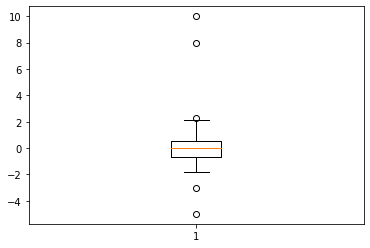

In [64]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

### 10.4.3. np.percentile()

[여기](https://github.com/govin08/aiffel/blob/master/004_article_and_materials/0905_np.percentile.ipynb)에 적어보았다.

### 10.4.3. IQR을 사용한 이상치 구하기 (연습)

In [65]:
A = np.array([1, 3, 4, 5, 5, 7, 8, 8, 9, 10])
B = np.array([1, 3, 4, 5, 5, 7, 8, 8, 9, 150])
df = pd.DataFrame(data = np.array([A,B]).T,columns = ['A','B'])
df

,A,B
0,1,1
1,3,3
2,4,4
3,5,5
4,5,5
5,7,7
6,8,8
7,8,8
8,9,9
9,10,150


In [66]:
np.array(df['A'])

array([ 1,  3,  4,  5,  5,  7,  8,  8,  9, 10])

In [67]:
Q1 = np.percentile(np.array(df['A']),25)
Q3 = np.percentile(np.array(df['A']),75)
IQR = Q3 - Q1
print("Q3 :",Q3)
print("Q1 :",Q1)
print("IQR :",IQR)

Q3 : 8.0
Q1 : 4.25
IQR : 3.75


In [68]:
df[(df['B']<Q1-1.5*IQR) | (df['B']>Q3+1.5*IQR)]

,A,B
9,10,150


In [69]:
def outlier2(df, col):
    Q1 = np.percentile(np.array(df[col]),25)
    Q3 = np.percentile(np.array(df[col]),75)
    IQR = Q3 - Q1
    return df[(df[col]<Q1-1.5*IQR) | (df[col]>Q3+1.5*IQR)]

In [70]:
outlier2(df,'A')

,A,B


In [71]:
outlier2(df,'B')

,A,B
9,10,150


### 10.4.4. IQR을 사용한 이상치 구하기 (실습)

In [72]:
trade

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [77]:
outlier2(trade,'무역수지')

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


## 10.5. 정규화(Normalization)

 - 표준화(Standardization)
$$X\mapsto\frac{X-\mu}{\sigma}$$
 - 정규화(Normalization)
$$X\mapsto\frac{X-X_{\text{min}}}{X_{\text{max}}-X_{\text{min}}}$$

In [78]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

,A,B
0,6.205792,-1.485248
1,-0.604047,-0.727779
2,3.018785,-0.517099
3,3.323325,-0.414949
4,6.167679,-0.582630
...,...,...
95,5.062917,-1.122239
96,-0.166839,-2.487547
97,-4.230178,0.589513
98,-0.562115,0.779614


 - `A`는 평균이 4이고 표준편차가 4인 정규분포에서 100개를 추출한 것이다.
 - `B`는 평균이 -1이고 표준편차가 1인 정규분포에서 100개를 추출한 것이다.
 - 중심극한정리에 의해, `A`의 평균은 4와 가깝고 표준편차는 4와 가깝다고 말할 수 있다. 마찬가지로 `B`의 평균은 -1과 가깝고, 표준편차는 과 가깝다고 말할 수 있다.
 - 실제 평균과 표준편차를 내보면 아래 코드와 같다.

In [89]:
print("A의 평균은",np.mean(x['A']))
print("A의 표준편차는",np.std(x['A']))
print("B의 평균은",np.mean(x['B']))
print("B의 표준편차는",np.std(x['B']))

A의 평균은 3.9541319617755875
A의 표준편차는 4.005627437148737
B의 평균은 -1.1550040610561316
B의 표준편차는 1.0431538951234554


In [79]:
# 데이터 x를 Standardization 기법으로 정규화합니다. 
x_standardization = (x - x.mean())/x.std()
x_standardization

,A,B
0,0.559307,-0.314995
1,-1.132240,0.407499
2,-0.232338,0.608450
3,-0.156691,0.705884
4,0.549839,0.545945
...,...,...
95,0.275419,0.031252
96,-1.023639,-1.271014
97,-2.032961,1.663966
98,-1.121824,1.845290


In [80]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.607216,0.426240
1,0.267692,0.571821
2,0.448318,0.612312
3,0.463502,0.631944
4,0.605316,0.599717
...,...,...
95,0.550235,0.496008
96,0.289490,0.233606
97,0.086901,0.824995
98,0.269782,0.861531


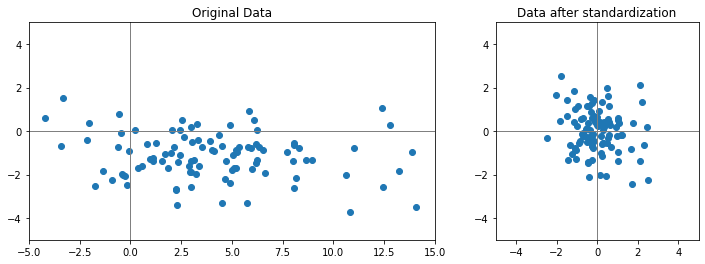

In [81]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

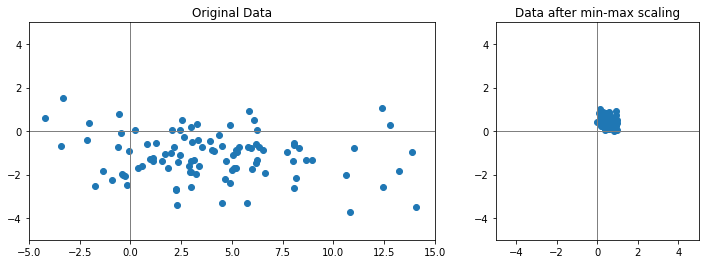

In [90]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

In [91]:
# trade 데이터를 Standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_Standardization= (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_Standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.256342
1,-0.689278,-0.252848,0.412529,-0.964444,0.401088
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.097779
3,-0.417598,0.852853,-0.576399,0.705292,0.832209
4,-0.764918,-0.389673,0.146306,-1.276341,0.438027


In [92]:
trade_Standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.093143e-16,6.832142e-17,1.821904e-17,-5.465713e-17,2.277381e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.603764e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.116765e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.426824e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.461637e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434109e+00


In [93]:
# trade 데이터를 min-max scaling 기법으로 정규화합니다. 
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660


In [94]:
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397180
std,0.156108,0.302099,0.235988,0.273790,0.247655
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [99]:
train

,0,1
0,10,-10
1,30,10
2,50,0


In [100]:
test

,0,1
0,0,1
1,10,10


test를 min-max scaling할 때도 train 정규화 기준으로 수행해야 한다.

In [96]:
train_min = train.min()
train_max = train.max()

train_min_max = (train - train_min)/(train_max - train_min)
test_min_max =  (test - train_min)/(train_max - train_min)    # test를 min-max scaling할 때도 train 정규화 기준으로 수행
print("💫 It's okay, no biggie...")

💫 It's okay, no biggie...


In [97]:
train_min_max

,0,1
0,0.0,0.0
1,0.5,1.0
2,1.0,0.5


In [98]:
test_min_max

,0,1
0,-0.25,0.55
1,0.00,1.00


`sklearn`을 사용.

In [101]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [102]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [103]:
scaler.transform(test)

array([[-0.25,  0.55]])

## 10.6. 원-핫 인코딩 (One-Hot Encoding)

In [112]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


In [111]:
# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [113]:
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


In [114]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


## 10.7. 구간화(Binning)

In [115]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])
print("👽 Almost there..")

👽 Almost there..


In [116]:
salary

0     4300
1     8370
2     1750
3     3830
4     1840
      ... 
95    3350
96    9450
97    7140
98    4170
99    3090
Length: 100, dtype: int64

<AxesSubplot:>

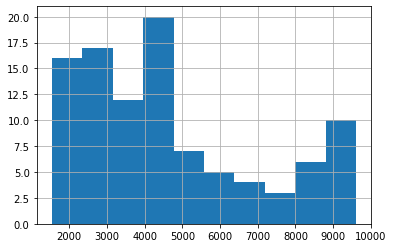

In [117]:
salary.hist()

In [118]:
bins = [0, 2000, 4000, 6000, 8000, 10000]
print("👽 Almost there..")

👽 Almost there..


<AxesSubplot:>

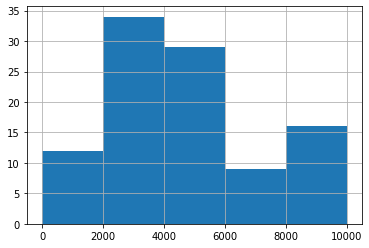

In [120]:
salary.hist(bins=bins)

In [121]:
ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

In [122]:
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


In [123]:
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

In [124]:
ctg = pd.cut(salary, bins=6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64, right]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [125]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
dtype: int64

In [126]:
ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64, right]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] < (4648.0, 7068.0] < (7068.0, 9610.0]]

In [128]:
print(ctg.value_counts().sort_index())
print(".\n.\n🛸 Well done!")

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
dtype: int64
.
.
🛸 Well done!


# 10.8. 추가과제